Phần 1 


đọc dữ liệu 

In [1]:
import re
from gensim.utils import simple_preprocess

file_path = r"D:\\project\\nlp\\week2\\lab1_tokenization\\src\\data\\en_ewt-ud-train.txt"

with open(file_path, "r", encoding="utf-8") as f:
    text = f.read()

tiền xử lý dữ liệu 

In [ ]:

# Tách câu dựa trên dấu chấm, chấm hỏi, chấm than
sentences = [simple_preprocess(sent) for sent in re.split(r'[.!?]', text) if sent.strip()]

print(f"Số câu: {len(sentences)}")
print(f"Ví dụ 1 câu sau xử lý: {sentences[0][:10]}")

Số câu: 11995
Ví dụ 1 câu sau xử lý: ['al', 'zaman', 'american', 'forces', 'killed', 'shaikh', 'abdullah', 'al', 'ani', 'the']


In [3]:

from gensim.models import Word2Vec

model = Word2Vec(
    sentences,
    vector_size=100,  # số chiều ban đầu của vector
    window=5,
    min_count=2,      # bỏ qua từ xuất hiện ít hơn 2 lần để giảm nhiễu
    workers=4,
    sg=1              # 1 = Skip-gram, 0 = CBOW
)

In [ ]:
# lấy vector của các từ 
words = list(model.wv.index_to_key)
X = model.wv[words]

print(f"Tổng số từ có vector: {len(words)}")

# giảm chiều bằng pca 
from sklearn.decomposition import PCA

Tổng số từ có vector: 8425


In [6]:
# PCA 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)


trực quan hóa 

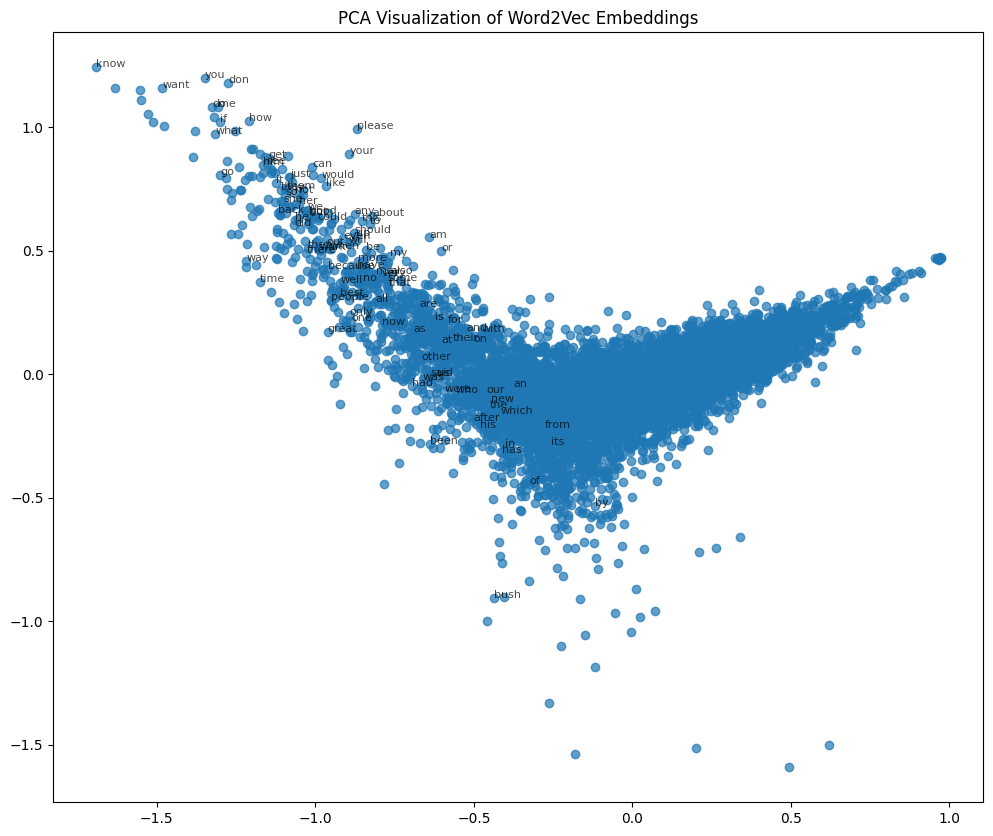

In [10]:

import matplotlib.pyplot as plt

def plot_vectors(X, labels, title):
    plt.figure(figsize=(12, 10))
    plt.scatter(X[:, 0], X[:, 1], alpha=0.7)
    for i, word in enumerate(labels[:100]):  # chỉ vẽ 100 từ đầu để dễ nhìn
        plt.annotate(word, (X[i, 0], X[i, 1]), fontsize=8, alpha=0.7)
    plt.title(title)
    plt.show()

# PCA Visualization
plot_vectors(X_pca, words, "PCA Visualization of Word2Vec Embeddings")